<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Controller-Design-Case-Study:-Vehicle-Lane-Keeping-Controller" data-toc-modified-id="Controller-Design-Case-Study:-Vehicle-Lane-Keeping-Controller-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Controller Design Case Study: Vehicle Lane Keeping Controller</a></span></li></ul></div>

## Controller Design Case Study: Vehicle Lane Keeping Controller

So far in this course, we have put a lot of concepts on the table, falling into three main conceptual categories:

1. State machine design
2. Modeling of Dynamics Systems
3. Feedback control design

State machines have been most useful in the later part of the course to organize the high-level operation of a system that might require several different feedback controllers to be active at different times or under different conditions. 

Modeling and control system design go hand-in-hand. To obtain a plant model and design a feedback controller around it, we have used modeling techniques and tools including Newton's laws, linearization using the Taylor series, the linear graph method, the transfer function, and the block diagram. After obtaining a plant model, we have most recently been using the root locus as a design tool to hit certain performance specifications with a feedback controller.

A relatively simple control problem that encompasses nearly all of the tools we've learned for modeling and control design is the problem of designing a system to steer a vehicle down a road. For the sake of simplicity, let's imagine that our vehicle has a constant forward speed, and is to follow a straight, flat road pointing East. 


The setup of the coordinate system for our problem is given below:

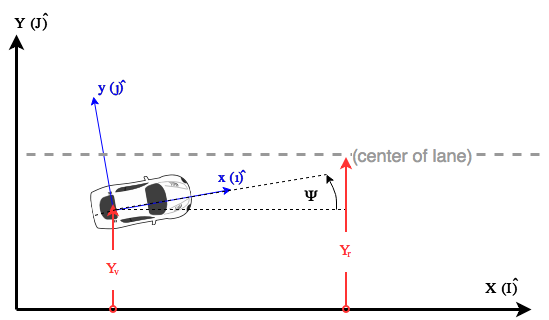

Eventually, what we'd like to come up with is a closed-loop system that allows us to use the vehicle's steering angle, which we'll call $\delta$, to steer the vehicle towards the center of the road. The block diagram we'd like to end up with at the end of our modeling efforts looks like this:

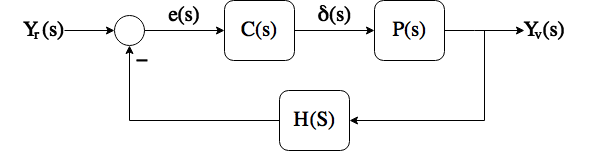

In order to get our control problem in this form, we will need a plant transfer function $P(s)$ that models the transformation from vehicle steering angle to vehicle global lateral position $Y_v$.

We will assume that the vehicle's tires do not slip laterally, and that it travels with constant forward velocity. Its rear axle's velocity vector in local coordinates $x$ and $y$ is:

$$\vec{v}_{car} = U\hat{\imath}$$

Transforming this velocity into the global coordinate system, we get:

$$\vec{v}_{car} = U\hat{\imath} = U(\cos \Psi \hat{I} + \sin \Psi \hat{J})$$

Taking only the global Y-coordinate of this velocity allows us to write:

$$\dot{Y}_v = U\sin\Psi$$

We would like to linearize the nonlinear sinusoidal function $\sin\Psi$ about $\Psi=0$ because hopefully, our controller will ensure that only small corrections from the road center are necessary. This leads to a linearized version for the derivative of the vehicle lateral position $Y_v$.

$$\dot{Y}_v \approx U\Psi$$

With this modification, we can model the transformation between yaw rate $\dot{\psi}$ and vehicle global lateral position $Y_v$:


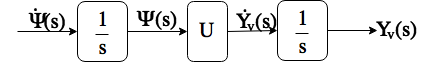

This is great, but if we want to use the steer angle $\delta$ as our control variable for this problem, we still need a transformation from the road wheel steer angle $\delta$ to the yaw rate $\dot{\Psi}$

Fortunately, the car's road wheels steer the car, which means that the steering wheels control the vehicle's yaw rate, which in turn allows the vehicle to change direction to steer towards the road center. 

By the arc-length equation, $s = R\Psi$, we know that the time-derivative of the arc length, which is the vehicle's forward speed $U$, can be obtained by taking the derivative of both sides of the above equation. Therefore, we know that $U = R\dot{\psi}$, which relates forward speed and turn radius to yaw rate. Specifically:

$$\dot{\Psi}=\frac{U}{R}$$

So if we can find the turn radius $R$ for a given steering angle $\delta$, we can determine the relationship between steering angle and yaw rate. In vehicle dynamics, we often draw a figure that shows how, at low speeds when the "no tire slip" assumption is valid, the vehicle's wheelbase and steer angle can be used to find the turn radius $R$ that results from a steering angle $\delta$.

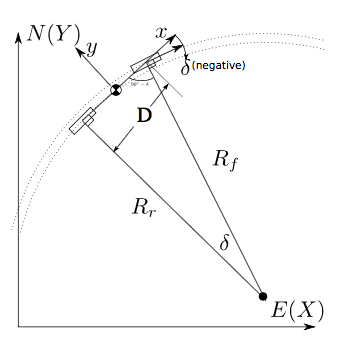

Using trigonometry on the triangle described by the turn center, the car's wheelbase $D$, and the vectors from the front and rear axles to the turn center, we can see that:

$$\frac{D}{R_r} = \tan\delta$$

If the steering angle $\delta$ is small, then we can write:

$$\frac{D}{R_r} \approx \delta$$

And further, if the turn radius is large, i.e. if $\delta$ is small, $R_r=R_f=R$. Now substituting and solving for $\dot{\Psi}$ as a function of known vehicle geometry and steer angle $\delta$, we obtain:

$$\dot{\Psi} = \frac{U\delta}{R}$$


Now that we have a transformation all the way from steering angle to vehicle lateral position, we can write our closed loop block diagram as:

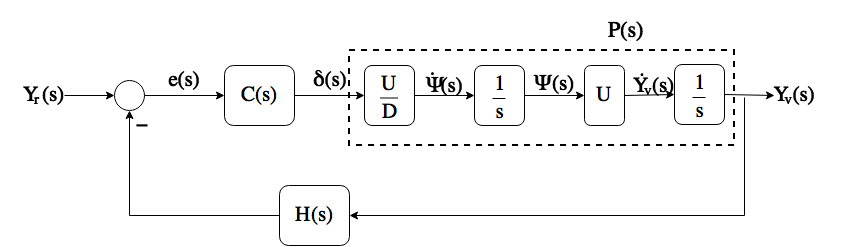

So now we can see that our "plant transfer function" under our simplified modeling assumptions (no tire slip, small yaw angle, etc.) is:

$$P(s) = \frac{Y_v(s)}{\delta(s)} = \frac{U^2}{Ds^2}$$

Now that we have a plant transfer function, the last step before we can consider a design for the controller $C(s)$ is finding a sensor transfer function $H(s)$. In a typical driving scenario, a human often assesses the vehicle's error with respect to the road center by looking some distance in front of the vehicle. This is also common with basic robotic lane-following systems that use cameras to detect the road center. We call the "lookahead" or "preview" distance at which the error is measured $L$. The error actually measured by the robot or human driver we will call $e$.

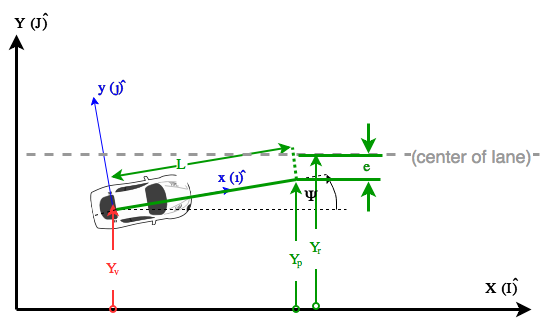

If we write an equation for the error that we actually will calculate at the sum block of our controller, we can write:

$$e = Y_r - Y_p$$

And using the vehicle's position, yaw angle, and preview distance, we can write:

$$Y_p = Y_v+L\sin \Psi$$

Again using the small angle approximation to linearize about $\Psi=0$, we find that:

$$Y_p \approx Y_v + L\Psi$$

If we leave our plant transfer function expanded in our closed-loop block diagram, we can build the signal $Y_p$ using a takeoff point at the signal representing vehicle yaw angle $\Psi$.

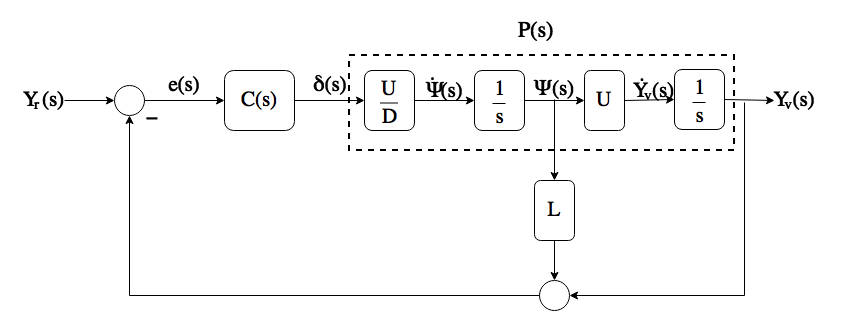

Using our properties of block diagram algebra, we can move this takeoff point to the right of $P(s)$, which will allow us to untangle the signal to build a "sensor transfer function" $H(s)$.

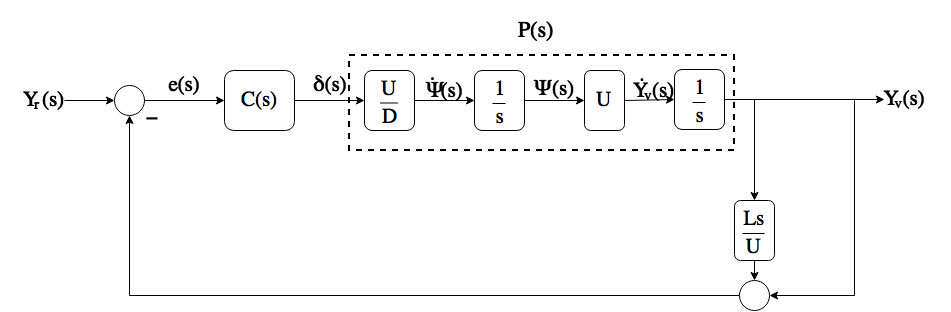

By simplifying the sum junction, we find that $Y_v(s)\left(1+\frac{Ls}{U}\right)=Y_p(s)$. Finding a common denominator leaves us with $H(s) = \frac{Ls+U}{U}$. Now, our final closed-loop block diagram is ready for us to design a control transfer function $C(s)$ using the root locus method:

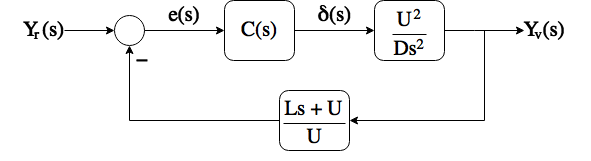

As we usually do when using the angle deficiency method to design a controller, let's explore the design space when the system is placed under proportional control. This means that we need to draw the root locus for the system under proportional control. Let's start with a vehicle that has a wheelbase $D$ of $2m$ and a lookahead or preview distance $L=3m$ traveling at $10\frac{m}{s}$, or roughly $20mph$.

In [ ]:
%load_ext oct2py.ipython

In [ ]:
%%octave 

s = tf('s');
U = 10;%forward speeed
D = 3;%distance between front and rear axles
L = 2;%preview (lookahead) distance
P = U^2/(D*s^2);%plant transfer function from steer->lateral position
H = (L*s+U)/U;%sensor transfer function measuring road lateral position at the lookahead distance

rlocus(P*H)

Notice that the "open loop system" $P(s)H(s)$ has two poles at the origin and one zero at $s=-\frac{U}{L}$. Now, these terms, the forward speed and the lookahead distance, aren't parameters that are explicitly part of our controller $C(s)$, but it is interesting to think about how the location of this zero is affected by vehicle speed and/or how far the driver (or robot) looks ahead of the car. Assuming that these quantities are fixed, however, let's find a proportional gain $K_p$ that allows us to hit a damping ratio of $\zeta=0.707$, and a damped natural frequency of $3.33\frac{rad}{s}$ or just over $0.5Hz$. This leads to a target eigenvalue of $s_d=-3.33+3.33j$. Note that the choice of closed-loop damped natural frequency is up to the control designer, but in this case, we would see a complete lane change (to steady state) occur in $t_s = \frac{4}{\zeta \omega_n} \approx 1.2s$, which would be considered fairly aggressive driving.

In [ ]:
%%octave 

s = tf('s');
U = 10;
L = 3;
D = 2;
P = U^2/(D*s^2);
H = (L*s+U)/U;

rlocus(P*H)
sd = - 3.33+3.33j;
PHmag = abs(U^2/(D*sd^2)*(L*sd+U)/U)

Kp = 1/PHmag

Gcl1 = minreal(Kp*P*H/(1+Kp*P*H))
figure
step(Gcl1)

This response seems pretty nice, but let's check the simulation to see what the steer angle $\delta$ looks like in response to a step input in desired vehicle position.

In [ ]:
%%octave 

s = tf('s');
U = 10;
L = 3;
D = 2;
P = U^2/(D*s^2);
H = (L*s+U)/U;

rlocus(P*H)
sd = - 3.33+3.33j;
PHmag = abs(U^2/(D*sd^2)*(L*sd+U)/U)

Kp = 1/PHmag

G_u = Kp/(1+Kp*P*H);
figure
step(G_u)
ylabel('ster angle required (rad)')


Unfortunately, this controller asks for over $0.6$ radians of steer angle **instantaneously** in response to our step request. This is a very large angle for a vehicle's road wheels, which usually have hard limits of under $20^\circ$. An instantaneous change in roadwheel angle is also unrealistic. To deal with this, we can explicitly  consider the effects of including actuator dynamics between the controller's request for a specific steering angle and the vehicle's actual steering angle. These dynamics are likely the result of a servomotor or something similar that is attached to the vehicle's steering column, and is responsible for actually steering the vehicle's wheels. This concept is shown in the block diagram below for a servomotor that has dynamics adequately described by a second order system with a zero, much like you might see with a DC motor under PD control on motor angular position:

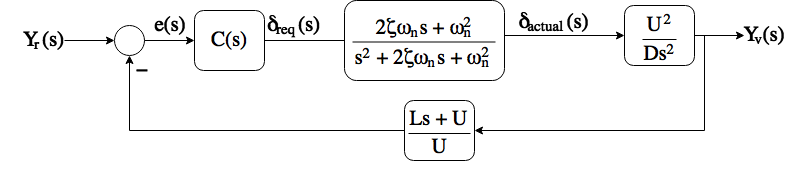

We can now look at the root locus of the system inclusive of the actuator dynamics, as shown in the Octave cell below.

In [ ]:
%%octave 

s = tf('s');
U = 10;
L = 3;
D = 2;
P = U^2/(D*s^2);
H = (L*s+U)/U;

sd = -3.33+3.33j;

w = 4*pi;
zeta = .707;
Pa = (2*zeta*w*s + w^2)/(s^2+2*zeta*w*s+w^2);
rlocus(Pa*P*H)
hold on
plot(real(sd),imag(sd),'r.','MarkerSize',20)


Notice that this root locus now has two extra branches. In this particular case, with our chosen actuator dynamics, the system will not go unstable, but notice that the two branches from the actuator transfer function become the dominant branches at high gain, and their fast, lightly damped oscillation will be problematic for our vehicle. To combat this problem, we could either design a PD controller to "bend back" these branches and create a second loop on the root locus, or pick a faster actuator. To explore these design possibilities, try your luck with the simulation of this control problem in the javascript app below. It allows you to turn actuator dynamics on and off, adjust many parameters in the problem, and even turn on a planar vehicle dynamic model with nonlinear tires, so that you can see the effects of some of our modeling assumptions with respect to the vehicle's motion on the controller performance.

In [ ]:
%%HTML
<p data-height="750" data-theme-id="0" data-slug-hash="GOqjdQ" data-default-tab="result" data-user="brownaa" data-embed-version="2" data-pen-title="Nonlinear_vehicle_preview_proportional_control" class="codepen">See the Pen <a href="https://codepen.io/brownaa/pen/GOqjdQ/">Nonlinear_vehicle_preview_proportional_control</a> by Alexander Brown (<a href="https://codepen.io/brownaa">@brownaa</a>) on <a href="https://codepen.io">CodePen</a>.</p>
<script async src="https://production-assets.codepen.io/assets/embed/ei.js"></script>